<a href="https://colab.research.google.com/github/aydawudu/ML_with_PyTorch_and_Sklearn/blob/main/Model_Evaluation_and_Hyperparameters_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [26]:


df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df.shape

(569, 32)

In [28]:
#label encode the target feature
from sklearn.preprocessing import LabelEncoder

X =df.loc[:, 2:].values
y=df.loc[:, 1].values
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_


array(['B', 'M'], dtype=object)

In [29]:
#let's check the mapping
le.transform(['M', 'B'])

array([1, 0])

In [30]:
#splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

### Combining transformers and estimators in a pipeline

In [31]:
#scaling, dimension reduction, and training
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr=make_pipeline(StandardScaler(),
                      PCA(n_components=2),
                      LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred=pipe_lr.predict(X_test)
test_acc=pipe_lr.score(X_test, y_test)
print(f'Test accuracy : {test_acc:.3f}')

Test accuracy : 0.956


## Using k-fold cross validation to assess model performance

The holdout method - training set, validation set and test set

K-fold cross-validation - training dataset is split into k folds without replacement

In [32]:
#Stratefued k-fold validation, provides betters bias and variance estimates and it preserves class proportation for unbalanced dataset
from sklearn.model_selection import StratifiedKFold

KFold =StratifiedKFold(n_splits=10).split(X_train, y_train)

scores=[]
for k, (train, test) in enumerate(KFold):
  pipe_lr.fit(X_train[train], y_train[train])
  score=pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)

  print(f'Fold: {k+1:02d}, '
        f'Class distr.: {np.bincount(y_train[train])}, '
        f'Acc.: {score:.3f} ')

mean_acc=np.mean(scores)
std_acc=np.std(scores)
print(f'\nCV accuracy : {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935 
Fold: 02, Class distr.: [256 153], Acc.: 0.935 
Fold: 03, Class distr.: [256 153], Acc.: 0.957 
Fold: 04, Class distr.: [256 153], Acc.: 0.957 
Fold: 05, Class distr.: [256 153], Acc.: 0.935 
Fold: 06, Class distr.: [257 153], Acc.: 0.956 
Fold: 07, Class distr.: [257 153], Acc.: 0.978 
Fold: 08, Class distr.: [257 153], Acc.: 0.933 
Fold: 09, Class distr.: [257 153], Acc.: 0.956 
Fold: 10, Class distr.: [257 153], Acc.: 0.956 

CV accuracy : 0.950 +/- 0.014


In [33]:
#using sklearn k-fold cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipe_lr,
                       X=X_train,
                       y=y_train,
                       cv=10,
                       n_jobs=1) #help define how many cpu to use.

print(f'CV accuracy scores : {scores}')
print(f'CV accuracy : {np.mean(scores):.3f} '
      f' +/- {np.std(scores):.3f}')

CV accuracy scores : [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy : 0.950  +/- 0.014


## Debugging algorithms with learning curves

### Diagnosing bias and variance problems with learning curves

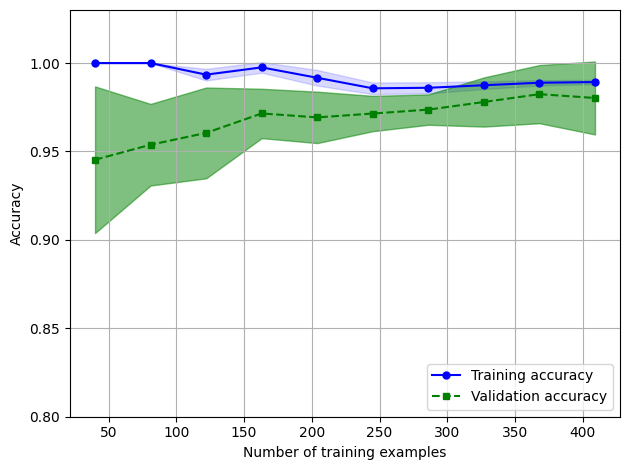

In [34]:
#learning curve
from sklearn.model_selection import learning_curve

pipe_lr=make_pipeline(StandardScaler(),
                      LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores= learning_curve(estimator=pipe_lr,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker = 'o', markersize=5,
         label='Training accuracy')

plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.5,
                 color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

### Addressing over- and underfitting with validation curves

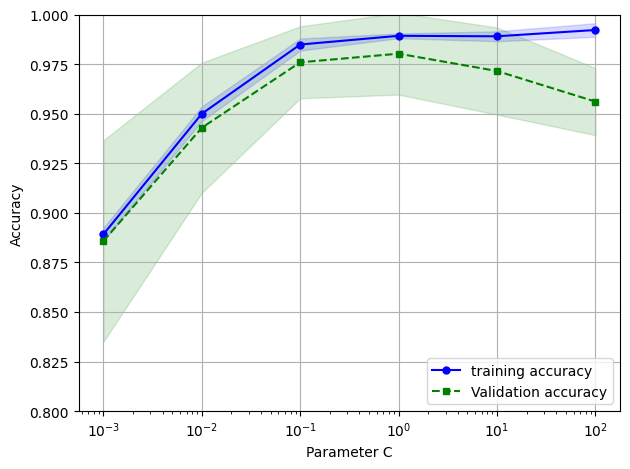

In [35]:
from sklearn.model_selection import validation_curve

param_range=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='logisticregression__C',
                param_range=param_range,
                cv=10)

train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha =0.15, color = 'blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std,
                 test_mean- test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

## Fine-tuning machine learning models via grid search


### Tuning hyperparameters via grid search

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid=[{'svc__C': param_range,
             'svc__kernel': ['linear']},
            {'svc__C':param_range,
             'svc__gamma':param_range,
             'svc__kernel': ['rbf']}]

gs=GridSearchCV(estimator=pipe_svc,
                param_grid=param_grid,
                scoring='accuracy',
                refit=True,
                cv=10)
gs=gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [37]:
#let use the best selected model for the test data
clf=gs.best_estimator_
print(f"Test accuracy: {clf.score(X_test, y_test):.3f}")

Test accuracy: 0.974


### Tuning hyperparameters via randomized search
- draws hyperparameters randomly from from distributions

### Exploring hyperparameter configurations more widely with randomized search

In [38]:
#lets specify the distribution
import scipy.stats

param_range=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_range=scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [39]:
from sklearn.model_selection import RandomizedSearchCV

pipe_svc=make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

param_grid=[{'svc__C': param_range,
             'svc__kernel':['linear']},
            {'svc__C':param_range,
            'svc__gamma':param_range,
             'svc__kernel':['rbf']}]

rs=RandomizedSearchCV(estimator=pipe_svc,
                      param_distributions=param_grid,
                      scoring='accuracy',
                      refit=True,
                      n_iter=20,
                      cv=10,
                      random_state=1,
                      n_jobs=-1)

In [40]:
rs=rs.fit(X_train, y_train)
print(rs.best_score_)

0.9780676328502416


In [41]:
print(rs.best_params_)

{'svc__C': 0.05971247755848463, 'svc__kernel': 'linear'}


### More resource-efficient hyperparameter search with successive halving

In [42]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [43]:
hs=HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource='n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1
)

In [44]:
hs=hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

0.9617647058823529
{'svc__C': 4.934834261073333, 'svc__kernel': 'linear'}


In [45]:
clf=hs.best_estimator_
print(f"Test accuracy: {hs.score(X_test, y_test):.3f}")

Test accuracy: 0.982


## Algorithm selection with nested cross-validation

In [61]:
#implementing the nested cross-validation with sklearn
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid=[{'svc__C': param_range,
             'svc__kernel': ['linear']},
            {'svc__C': param_range,
             'svc__gamma': param_range,
             'svc__kernel': ['rbf']}]

In [62]:
#nested cross validation
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')



CV accuracy: 0.974 +/- 0.015


In [63]:
#trying it on decision tree
from sklearn.tree import DecisionTreeClassifier

gs=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid=[{'max_depth': [1,2,3,4,5,6,7, None]}],
                scoring='accuracy',
                cv=2)

scores=cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f}'
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.934+/- 0.016


## Looking at different performance evaluation metrics
...

### Reading a confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[71  1]
 [ 2 40]]


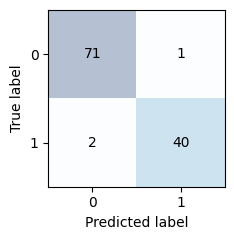

In [65]:
#let's visualize
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

## Optimizing the precision and recall of a classification model

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val=precision_score(y_true=y_test, y_pred=y_pred)
print(f'Precision :  {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

Precision :  0.976
Recall: 0.952
F1: 0.964
MCC: 0.943


In [67]:
#let's change the scoring method in the GridSearchSV
from sklearn.metrics import make_scorer
scorer=make_scorer(f1_score, pos_label=0)

c_gamma_range=[0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C':c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel':['rbf']}]

gs=GridSearchCV(estimator=pipe_svc,
                param_grid=param_grid,
                scoring=scorer,
                cv=10,
                n_jobs=-1)
gs=gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


### Plotting a receiver operating characteristic

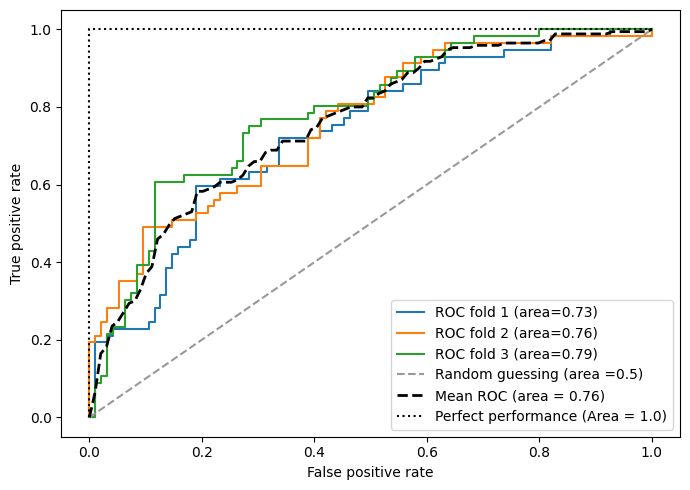

In [70]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr=make_pipeline(StandardScaler(),
                      PCA(n_components=2),
                      LogisticRegression(penalty='l2',
                                         random_state=1,
                                         solver='lbfgs',
                                         C=100.0))

X_train2= X_train[:, [4, 14]] #reducing the features used in this training

cv=list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr=0.0
mean_fpr=np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
  probas=pipe_lr.fit(X_train2[train],
                     y_train[train]).predict_proba(X_train2[test])

  fpr, tpr, thresholds=roc_curve(y_train[test],
                                 probas[:, 1],
                                 pos_label = 1)

  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc=auc(fpr, tpr)
  plt.plot(fpr, tpr, label= f'ROC fold {i+1} (area={roc_auc:.2f})')

plt.plot([0, 1],
           [0, 1],
           linestyle='--',
           color= (0.6, 0.6, 0.6),
           label='Random guessing (area =0.5)')

mean_tpr/=len(cv)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
           label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
           [0, 1, 1],
           linestyle=':',
           color='black',
           label='Perfect performance (Area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### The scoring metrics for multiclass classification


In [71]:
pre_scorer=make_scorer(score_func=precision_score,
                       pos_label=1,
                       greater_is_better=True,
                       average='micro')

### Dealing with class imbalance

In [72]:
#create imbalance dataset
X_imb=np.vstack((X[y == 0], X[y==1][:40]))
y_imb=np.hstack((y[y==0], y[y==1][:40]))

In [73]:
y_pred=np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [75]:
from sklearn.utils import resample

print('Number of class 1 example before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled=resample(X_imb[y_imb == 1],
                                  y_imb[y_imb == 1],
                                  replace=True,
                                  n_samples=X_imb[y_imb == 0].shape[0],
                                  random_state=123)

print('Number of class 1 exxample:', X_upsampled.shape[0])

Number of class 1 example before: 40
Number of class 1 exxample: 357


In [76]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [77]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0